# Phase 1 - Normal Task : Exploratory Data Analysis - Terrorism

Dataset : https://www.kaggle.com/code/razamh/exploratory-data-analysis-terrorism/input

### Problem Statement

The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset
to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover
trends, identify high-risk regions, understand attack characteristics, and potentially reveal
factors that contribute to terrorist activities.

### Importing libraries

In [1]:
import numpy as nd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [2]:
data = pd.read_csv('Exploratory Data Analysis - Terrorism dataset.csv', encoding = 'latin1')
df=pd.DataFrame(data)
print("Data has been imported")
df.head()

/var/folders/v4/tdc6fg5d3pg4wnt14g96mzv00000gn/T/ipykernel_76357/2099684718.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Exploratory Data Analysis - Terrorism dataset.csv', encoding = 'latin1')


Data has been imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# to get info about the loaded data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
# to get the shape of the data
df.shape

(181691, 135)

### Cleaning Data

In [7]:
df =df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [8]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [113]:
df.info #to get Information related to the dataframe

<bound method DataFrame.info of         Year  Month  Day             Country                       Region  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
1       1970      0    0              Mexico                North America   
2       1970      1    0         Philippines               Southeast Asia   
3       1970      1    0              Greece               Western Europe   
4       1970      1    0               Japan                    East Asia   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

         Province/State           City   La

In [114]:
df.shape # to get the dimensions of the dataframe

(181691, 20)

In [11]:
df.isnull()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True,True,True
4,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


In [12]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [13]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
# adding casualty section by adding killed and wounded ones

In [14]:
df.describe

<bound method NDFrame.describe of         Year  Month  Day             Country                       Region  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
1       1970      0    0              Mexico                North America   
2       1970      1    0         Philippines               Southeast Asia   
3       1970      1    0              Greece               Western Europe   
4       1970      1    0               Japan                    East Asia   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

         Province/State           City   

In [15]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


#### This data consists of terrorist activities between 1970 to 2017.
#### Maximum number of people killed in an event were 1570.
#### Maximum number of people wounded in an event were 8191.
#### Maximum number of casualties in an event were 9574.


### Data Visualization

#### Based On Year

1. Attacks In Each Year

In [16]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


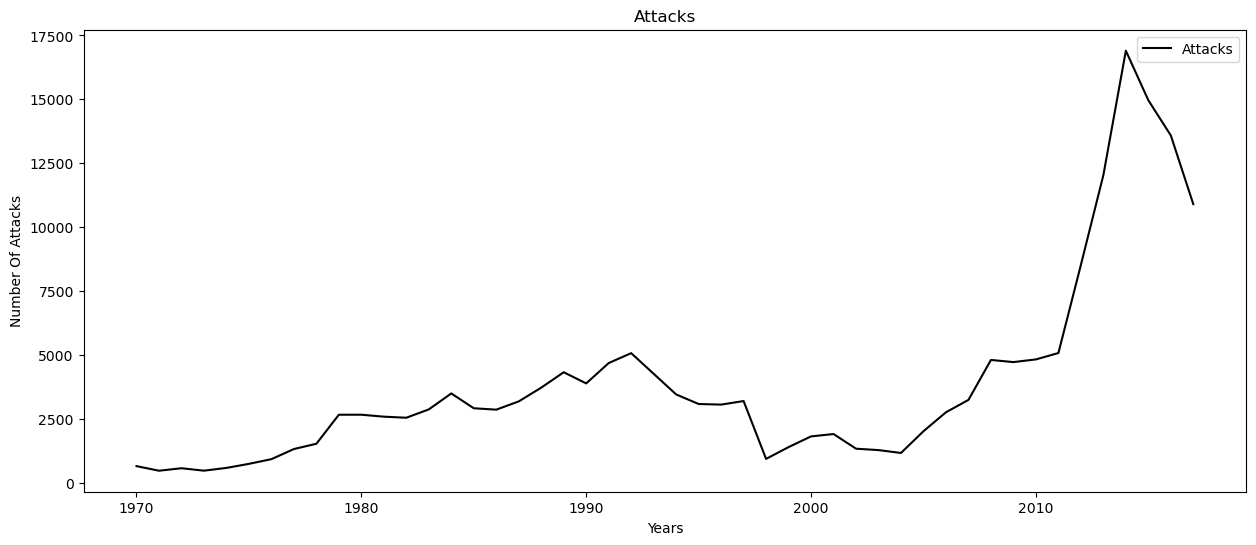

In [17]:
attacks.plot(kind="line",color="black",figsize=(15,6))
plt.title("Attacks")
plt.xlabel("Years")
plt.ylabel("Number Of Attacks")
plt.show()

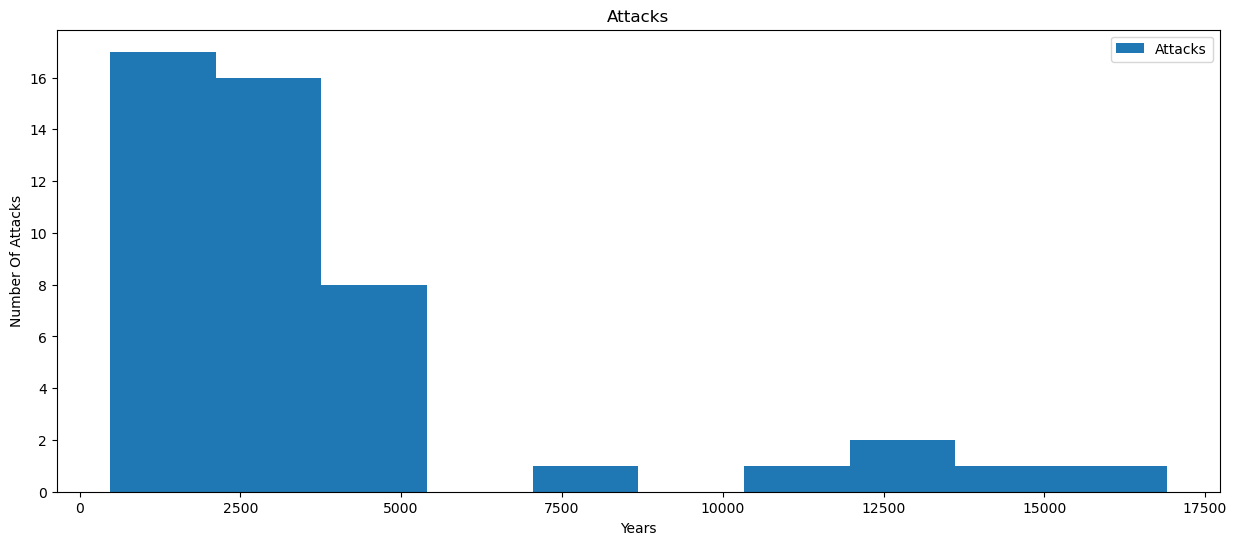

In [18]:
attacks.plot(kind="hist",figsize=(15,6))
plt.title("Attacks")
plt.xlabel("Years")
plt.ylabel("Number Of Attacks")
plt.show()

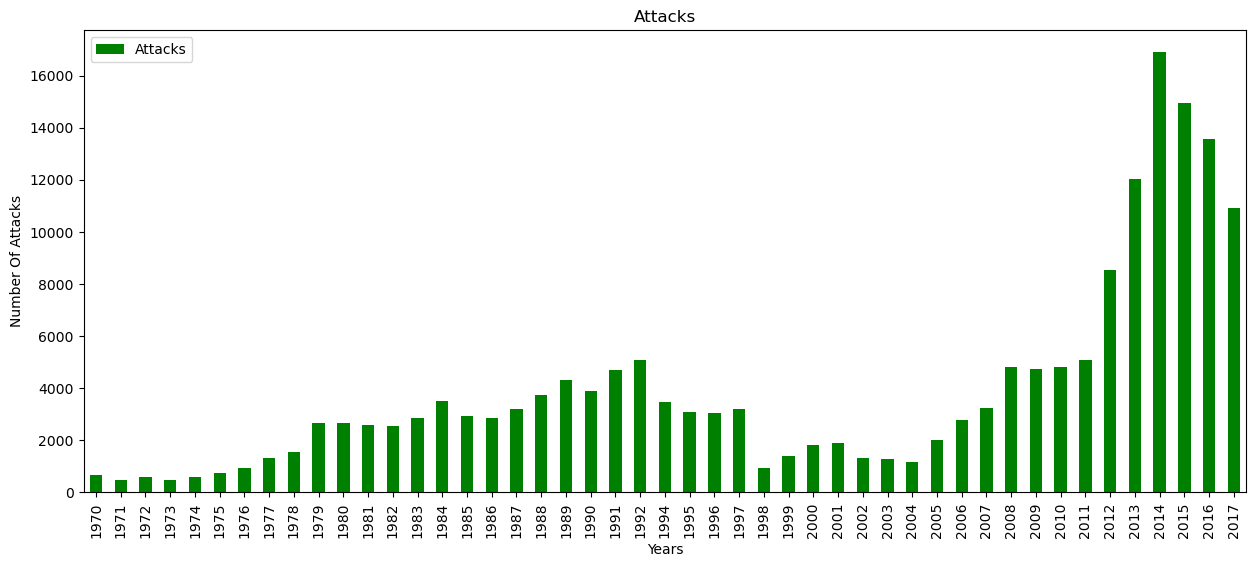

In [19]:
attacks.plot(kind="bar",color="green",figsize=(15,6))
plt.title("Attacks")
plt.xlabel("Years")
plt.ylabel("Number Of Attacks")
plt.show()

2. Casualties In Each Year

In [20]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


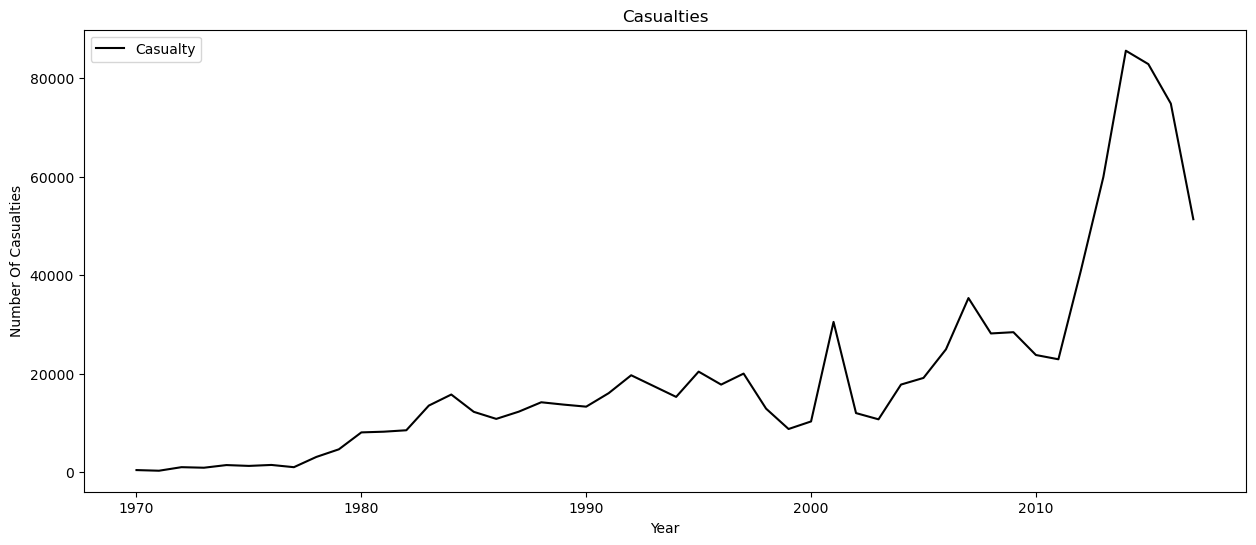

In [21]:
yc.plot(kind="line",color="black",figsize=(15,6))
plt.title("Casualties")
plt.xlabel("Year")
plt.ylabel("Number Of Casualties")
plt.show()

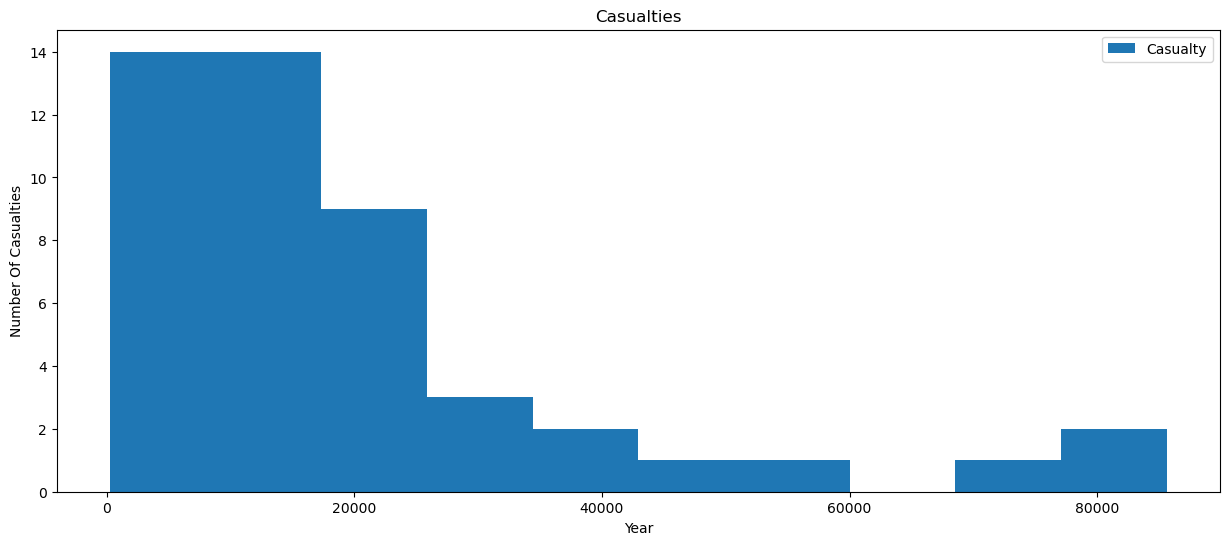

In [22]:
yc.plot(kind="hist",figsize=(15,6))
plt.title("Casualties")
plt.xlabel("Year")
plt.ylabel("Number Of Casualties")
plt.show()

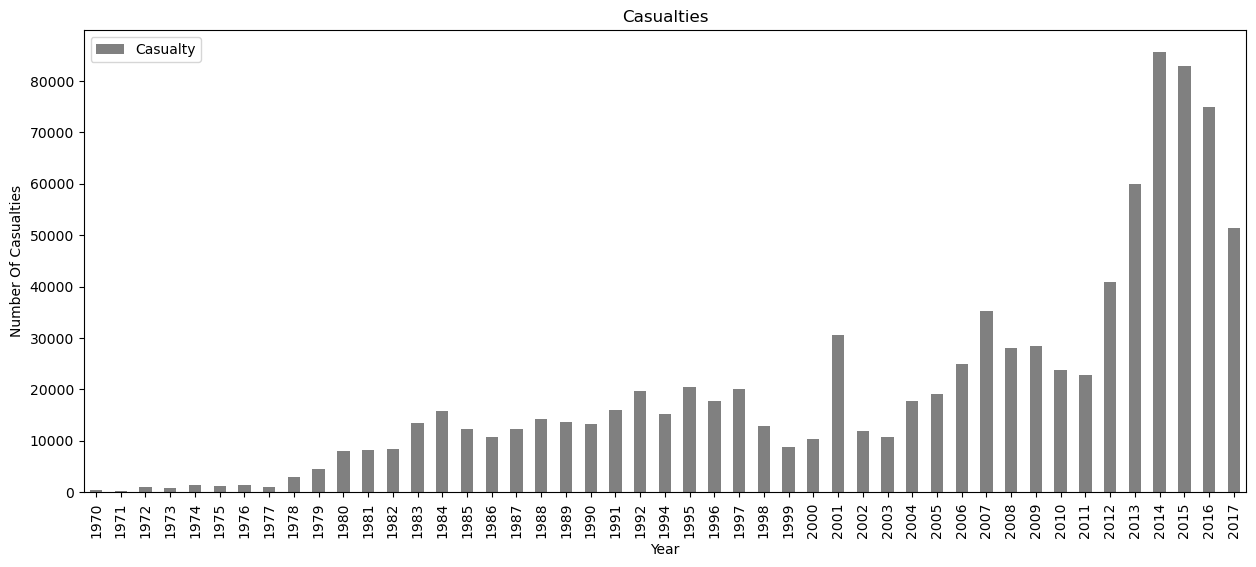

In [23]:
yc.plot(kind="bar",color="grey",figsize=(15,6))
plt.title("Casualties")
plt.xlabel("Year")
plt.ylabel("Number Of Casualties")
plt.show()

3. Deaths In Each Year

In [24]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


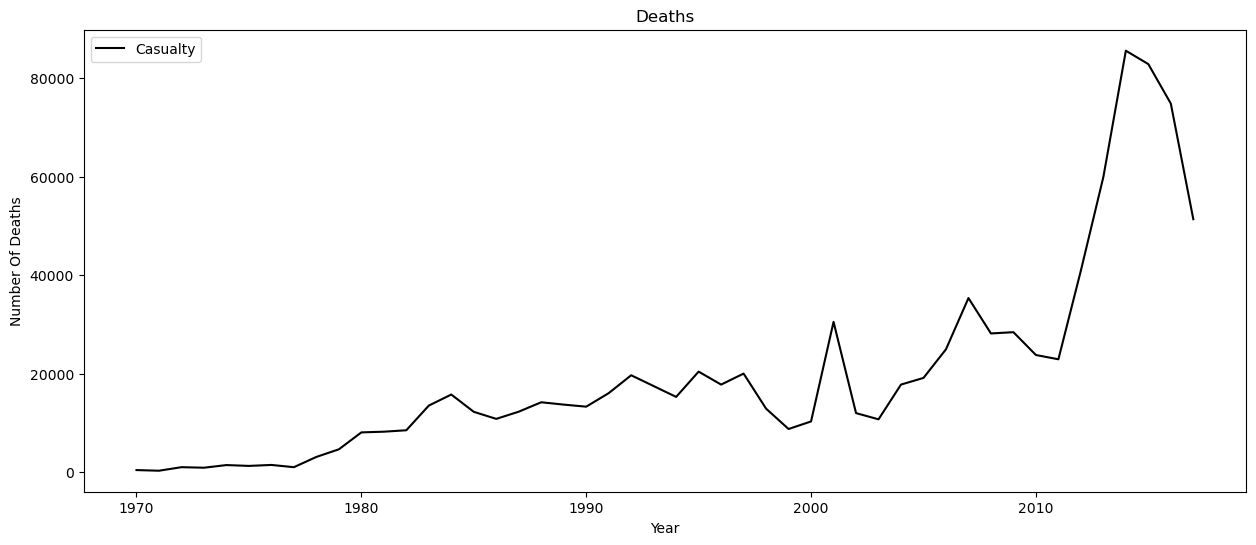

In [25]:
yc.plot(kind="line",color="black",figsize=(15,6))
plt.title("Deaths")
plt.xlabel("Year")
plt.ylabel("Number Of Deaths")
plt.show()

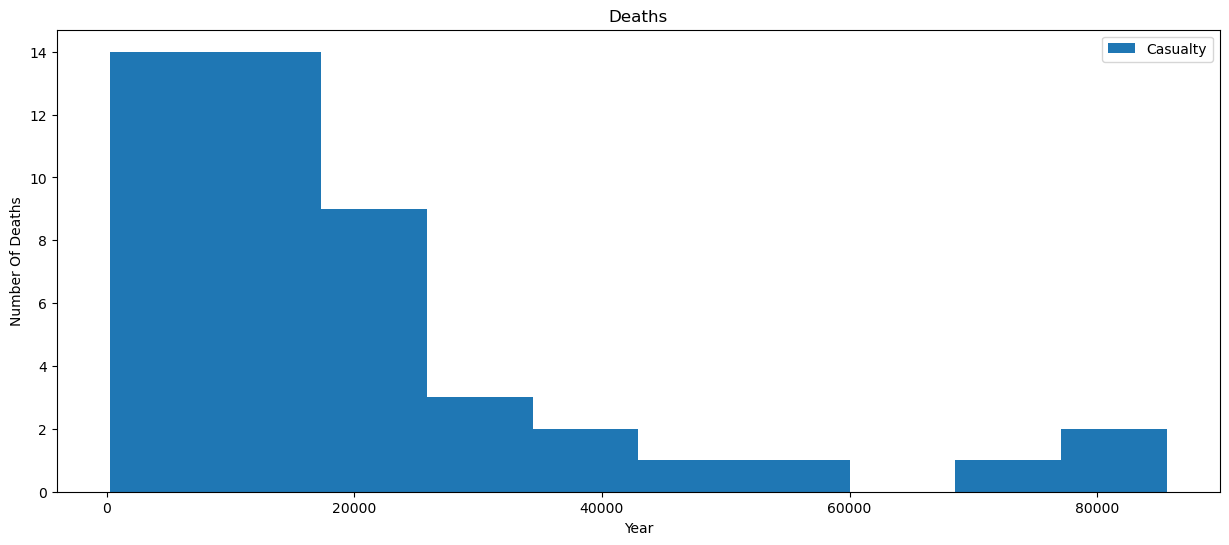

In [26]:
yc.plot(kind="hist",figsize=(15,6))
plt.title("Deaths")
plt.xlabel("Year")
plt.ylabel("Number Of Deaths")
plt.show()

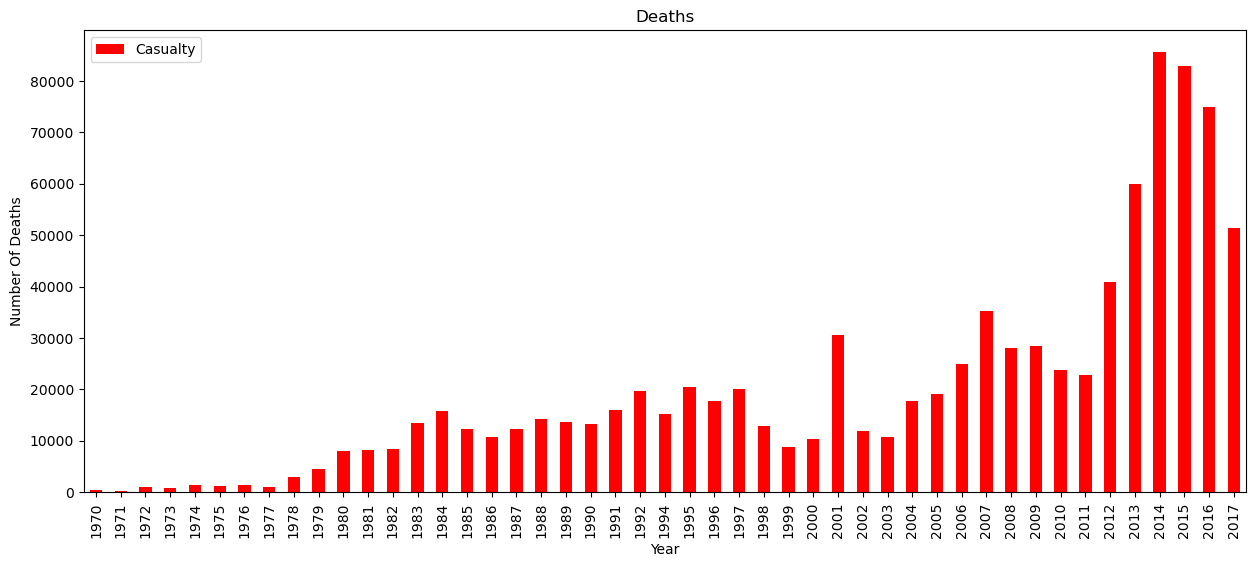

In [27]:
yc.plot(kind="bar",color="red",figsize=(15,6))
plt.title("Deaths")
plt.xlabel("Year")
plt.ylabel("Number Of Deaths")
plt.show()

4. Wounded In Each Year

In [28]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


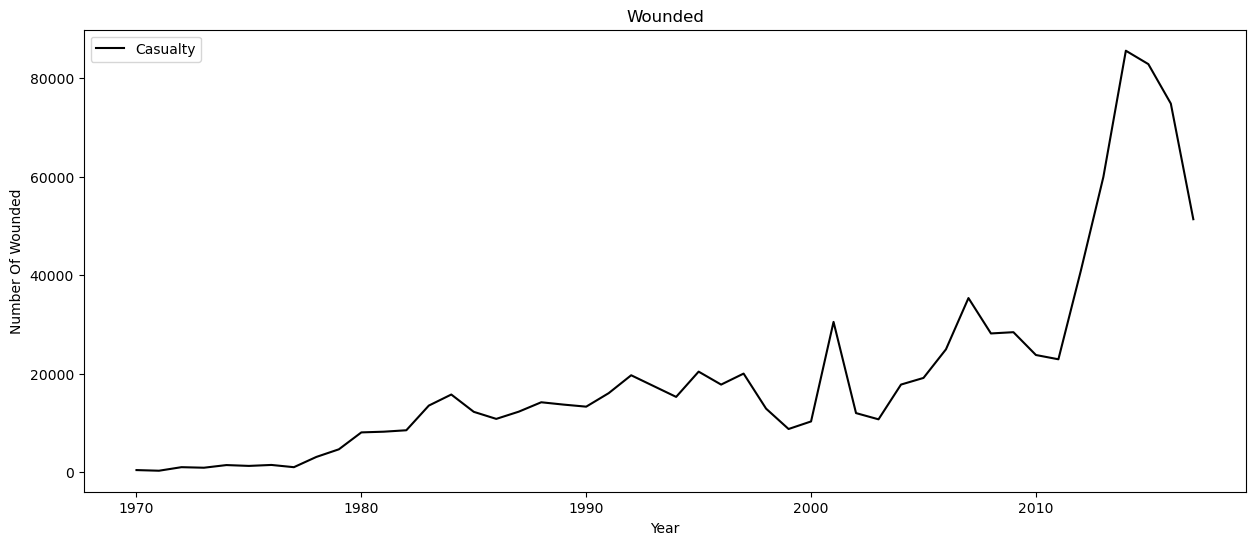

In [29]:
yc.plot(kind="line",color="black",figsize=(15,6))
plt.title("Wounded")
plt.xlabel("Year")
plt.ylabel("Number Of Wounded")
plt.show()

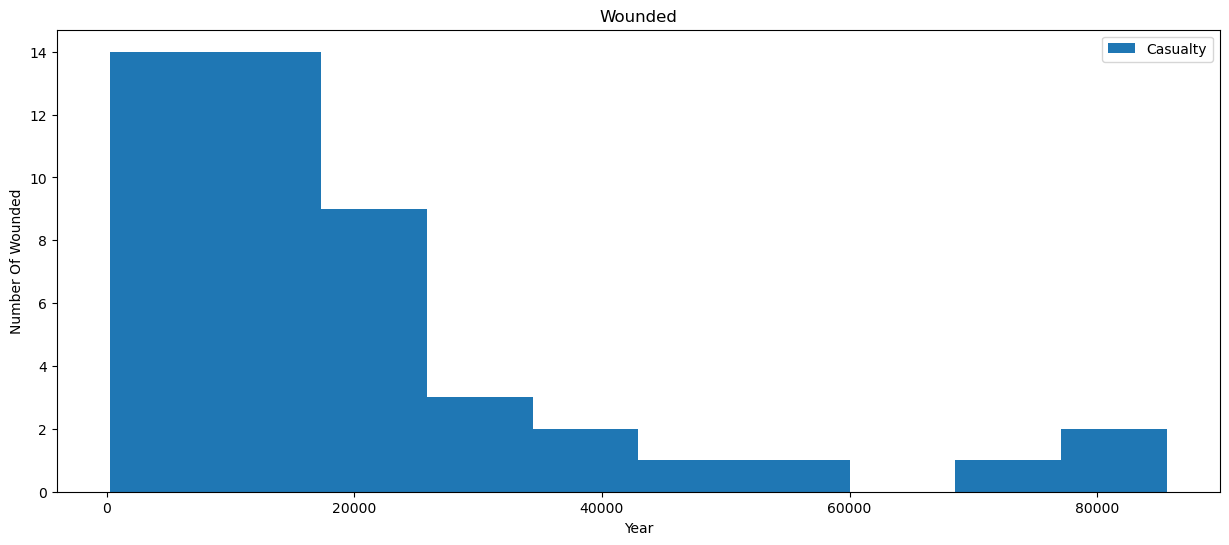

In [30]:
yc.plot(kind="hist",figsize=(15,6))
plt.title("Wounded")
plt.xlabel("Year")
plt.ylabel("Number Of Wounded")
plt.show()

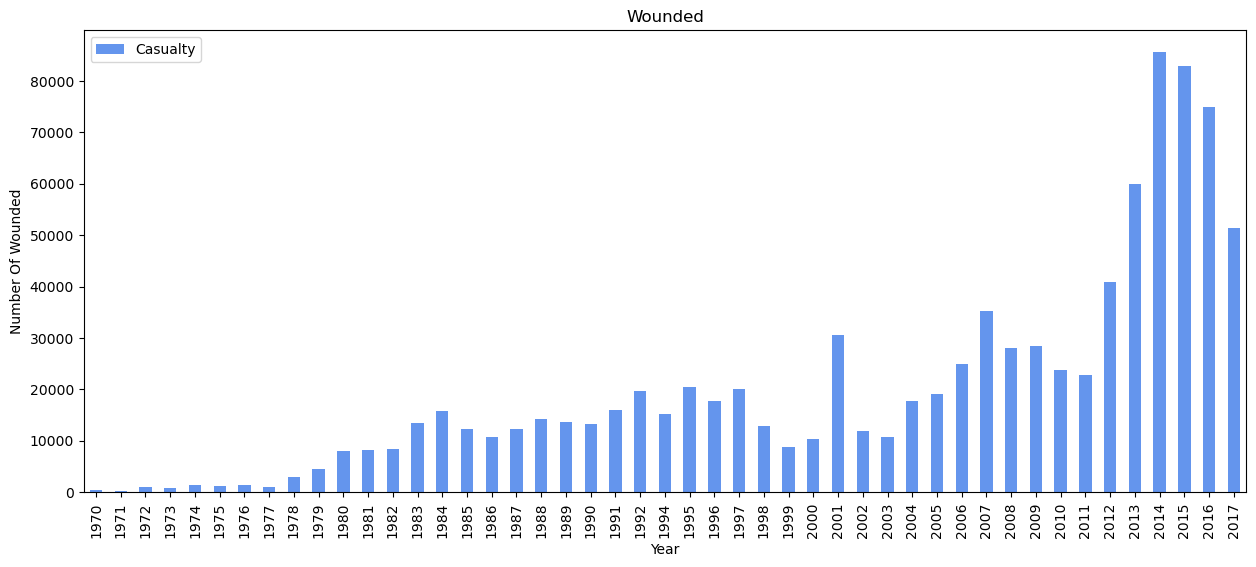

In [31]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Wounded")
plt.xlabel("Year")
plt.ylabel("Number Of Wounded")
plt.show()

Observation
1. Attacks 
    (a) Most number of attacks: 16903 in 2014 
    (b) Least number of attacks: 471 in 1971 
2. Casualties 
    (a) Most number of casualties: 85618 in 2014 
    (b) Least number of casualties: 255 in 1971 
3. Killed 
    (a) Most number of people killed: 44490 in 2014 
    (b) Least number of people killed: 173 in 1971 
5. Wounded
    (a) Most number of people wounded: 44043 in 2015 
    (b) Least number of people wounded: 82 in 1971 


#### Based On Region

1. Attacks based on region 

In [32]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


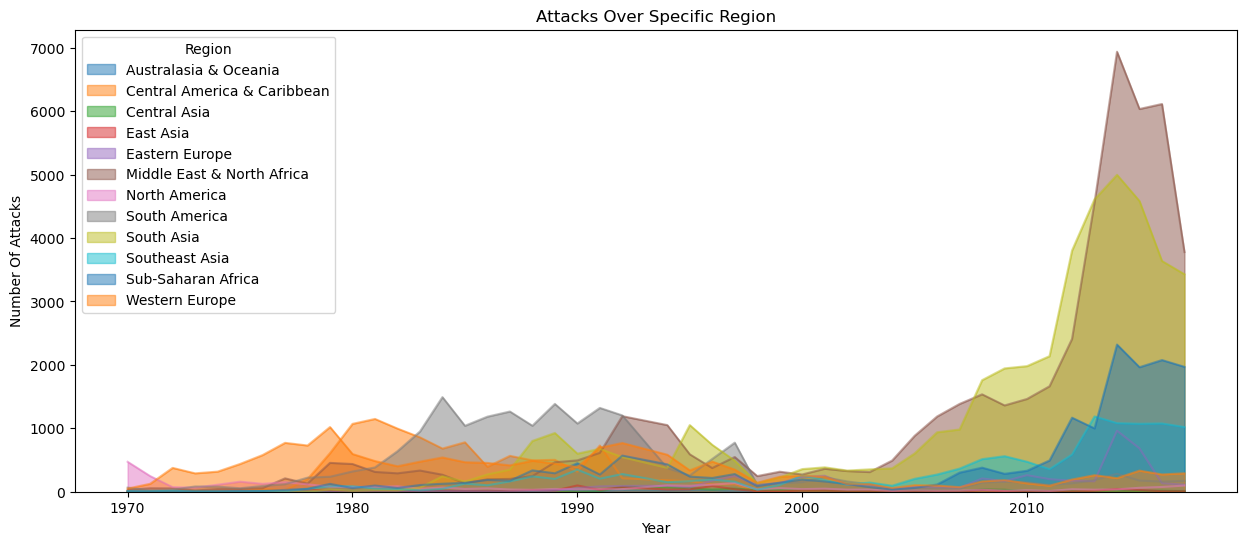

In [34]:
reg.plot(kind="area",stacked=False,figsize=(15,6))
plt.title("Attacks Over Specific Region")
plt.xlabel("Year")
plt.ylabel("Number Of Attacks")
plt.show()

2. Region with their total attacks

In [35]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

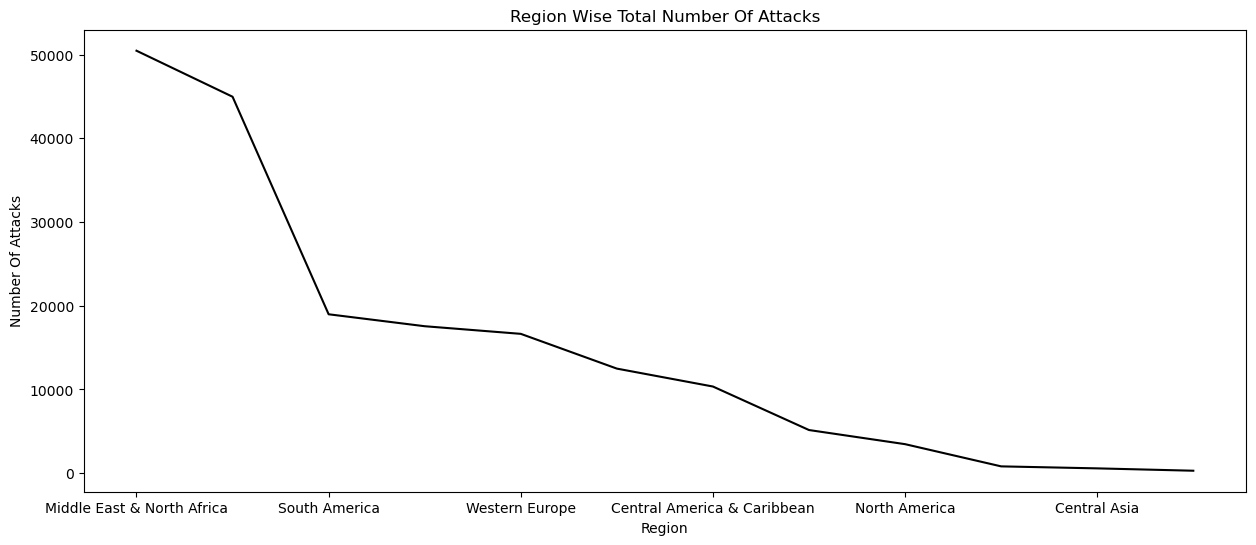

In [53]:
ra.plot(kind="line",color="black",figsize=(15,6))
plt.title("Region Wise Total Number Of Attacks")
plt.xlabel("Region")
plt.ylabel("Number Of Attacks")
plt.show()

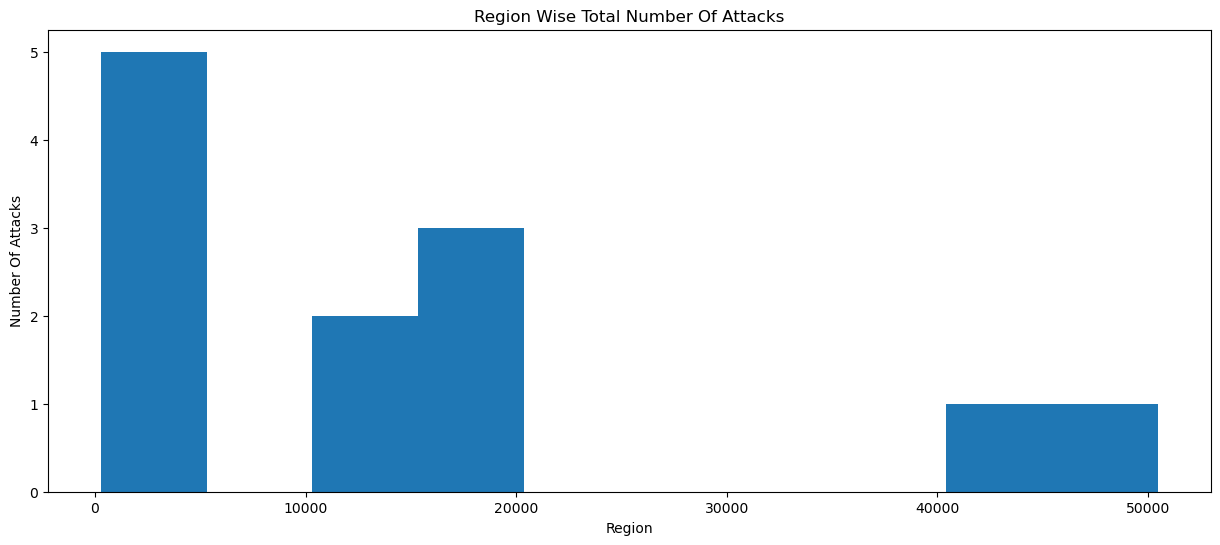

In [54]:
ra.plot(kind="hist",figsize=(15,6))
plt.title("Region Wise Total Number Of Attacks")
plt.xlabel("Region")
plt.ylabel("Number Of Attacks")
plt.show()

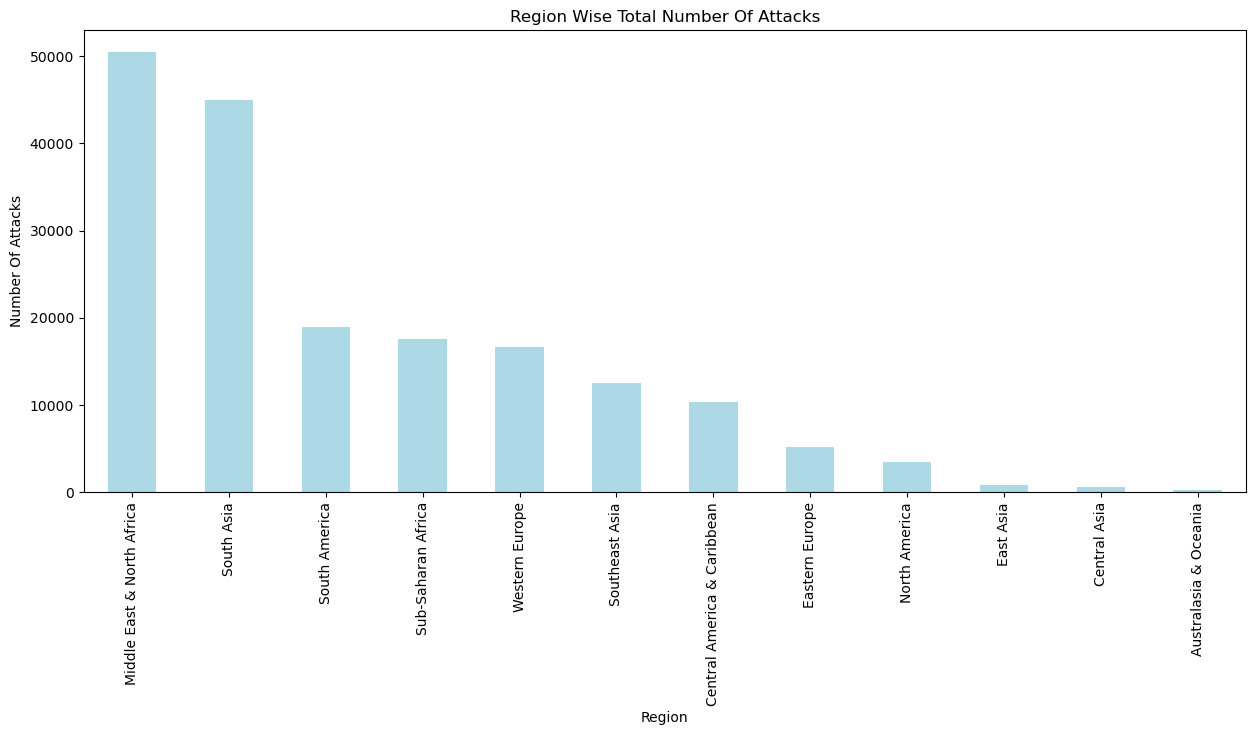

In [55]:
ra.plot(kind="bar",color="lightblue",figsize=(15,6))
plt.title("Region Wise Total Number Of Attacks")
plt.xlabel("Region")
plt.ylabel("Number Of Attacks")
plt.show()

3. Casualties In Each region 

In [56]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty", ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


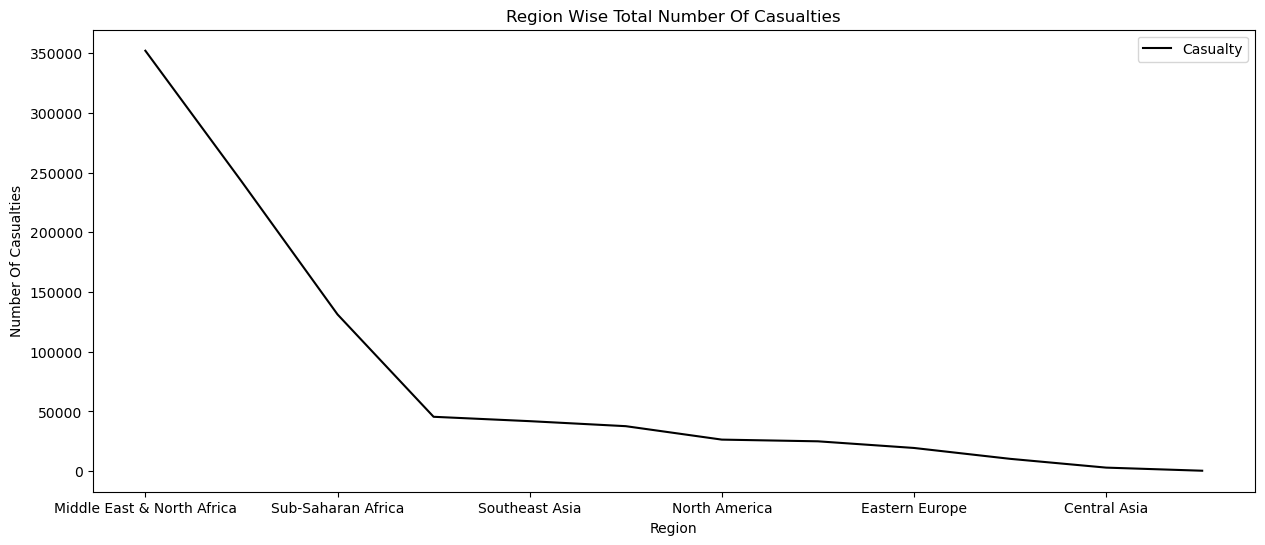

In [57]:
rc.plot(kind="line",color="black",figsize=(15,6))
plt.title("Region Wise Total Number Of Casualties")
plt.xlabel("Region")
plt.ylabel("Number Of Casualties")
plt.show()

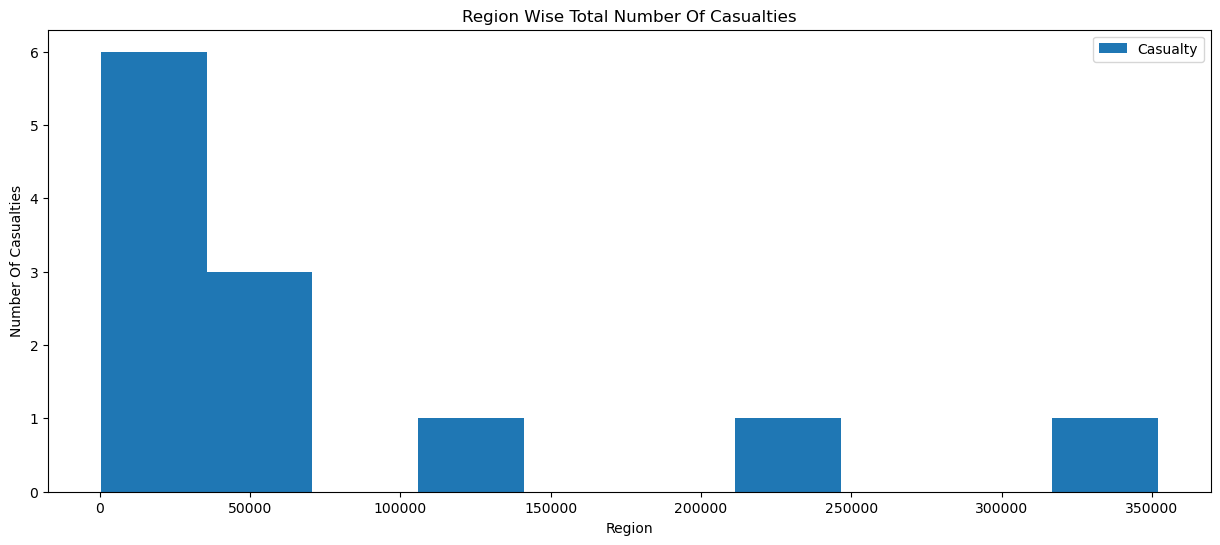

In [58]:
rc.plot(kind="hist",figsize=(15,6))
plt.title("Region Wise Total Number Of Casualties")
plt.xlabel("Region")
plt.ylabel("Number Of Casualties")
plt.show()

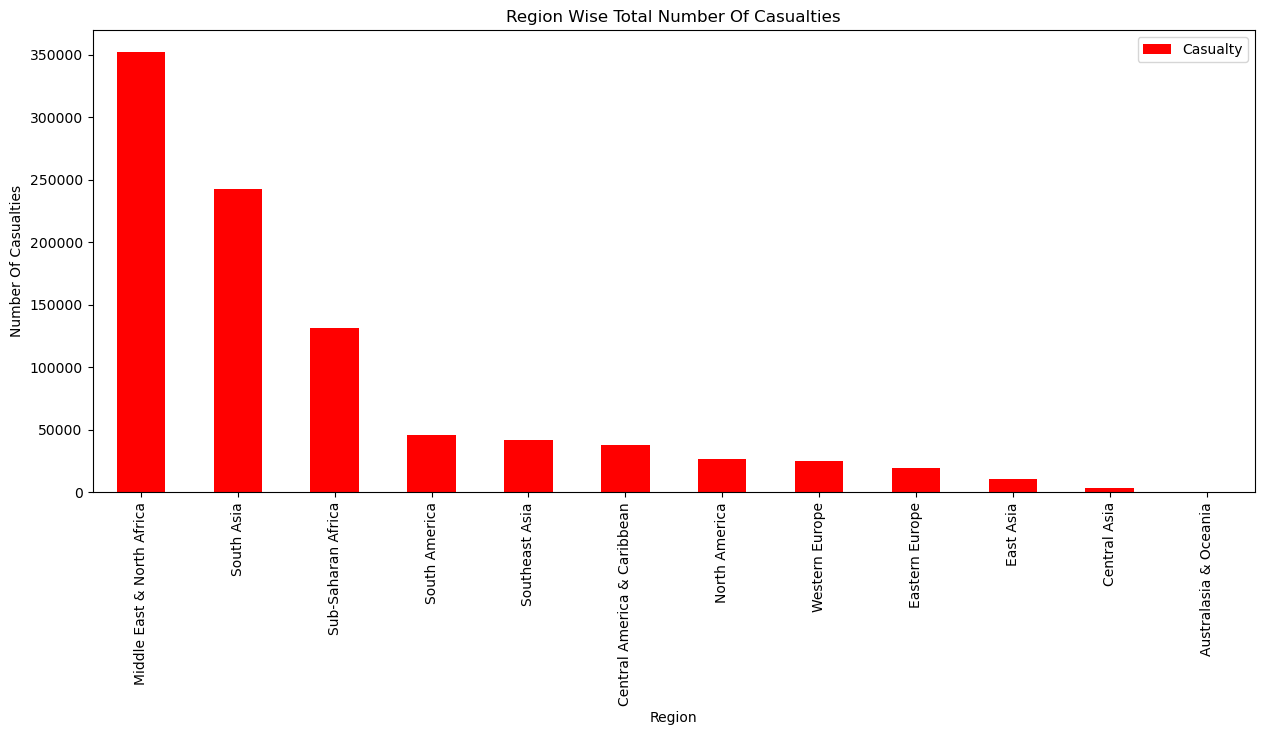

In [60]:
rc.plot(kind="bar",color="red",figsize=(15,6))
plt.title("Region Wise Total Number Of Casualties")
plt.xlabel("Region")
plt.ylabel("Number Of Casualties")
plt.show()

4. People killed in each region

In [61]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed", ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


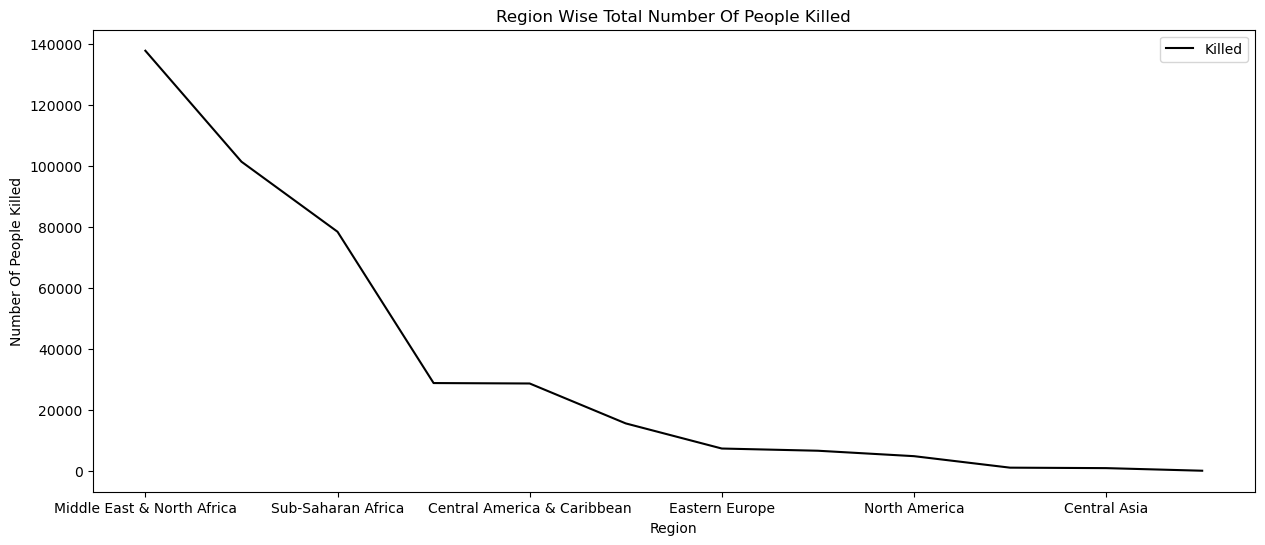

In [71]:
rk.plot(kind="line",color="black",figsize=(15,6))
plt.title("Region Wise Total Number Of People Killed")
plt.xlabel("Region")
plt.ylabel("Number Of People Killed")
plt.show()

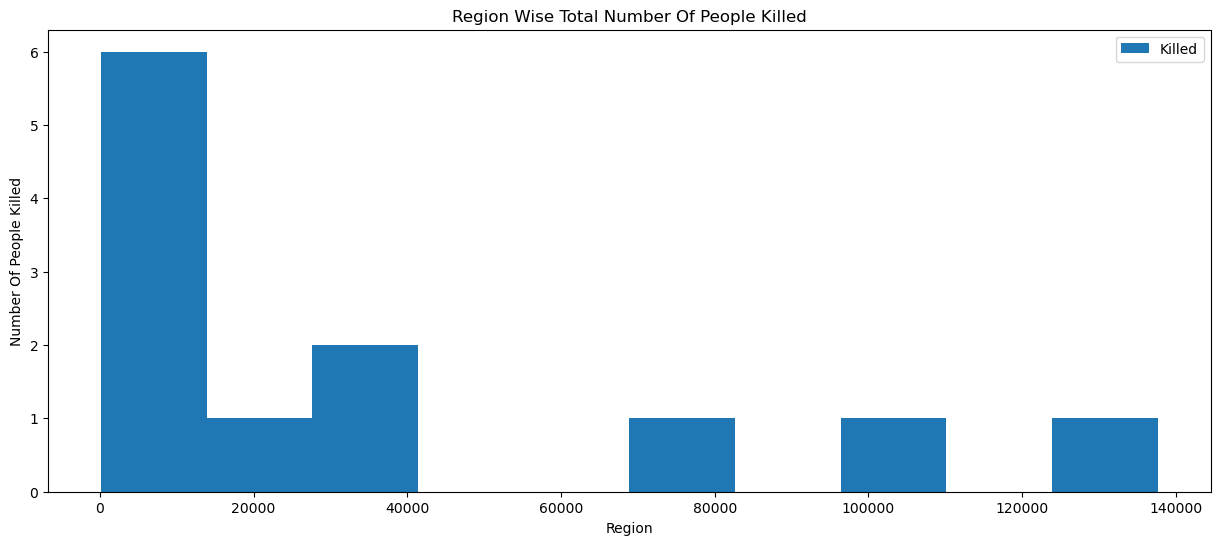

In [70]:
rk.plot(kind="hist",figsize=(15,6))
plt.title("Region Wise Total Number Of People Killed")
plt.xlabel("Region")
plt.ylabel("Number Of People Killed")
plt.show()

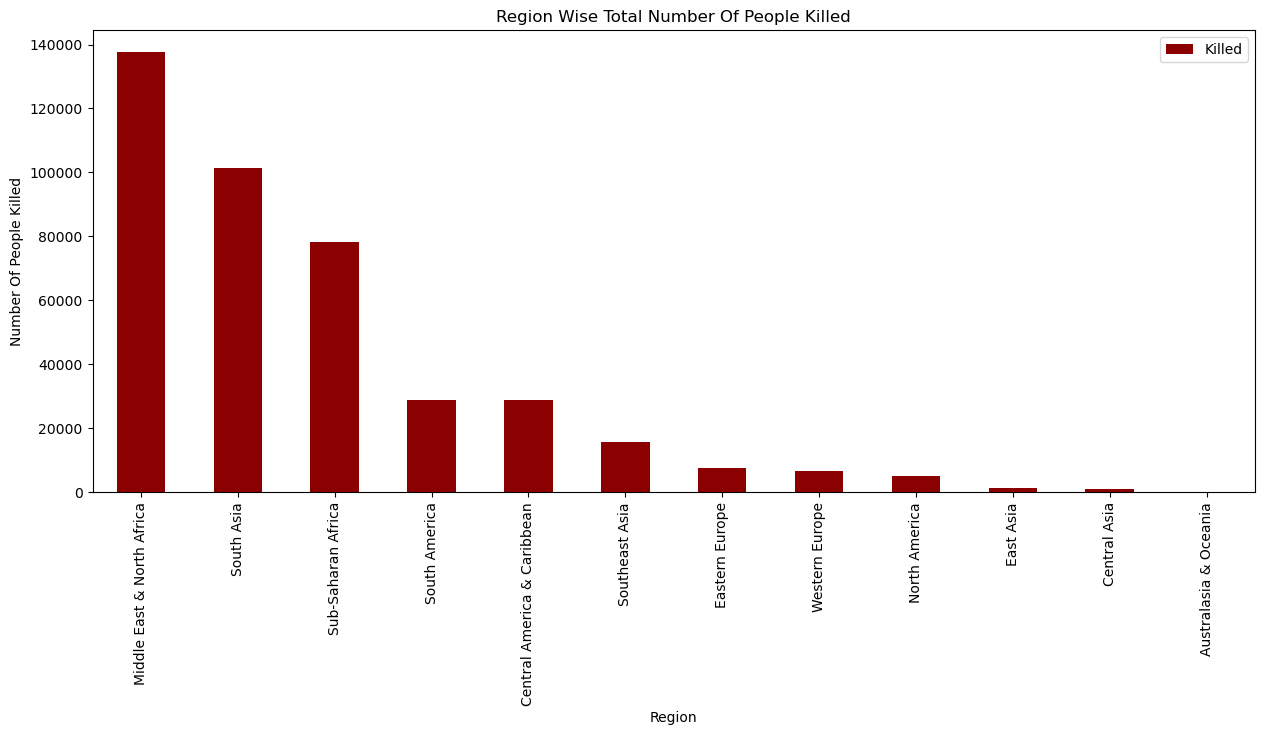

In [69]:
rk.plot(kind="bar",color="dARKRED",figsize=(15,6))
plt.title("Region Wise Total Number Of People Killed")
plt.xlabel("Region")
plt.ylabel("Number Of People Killed")
plt.show()

5. People Wounded in each region

In [66]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded", ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


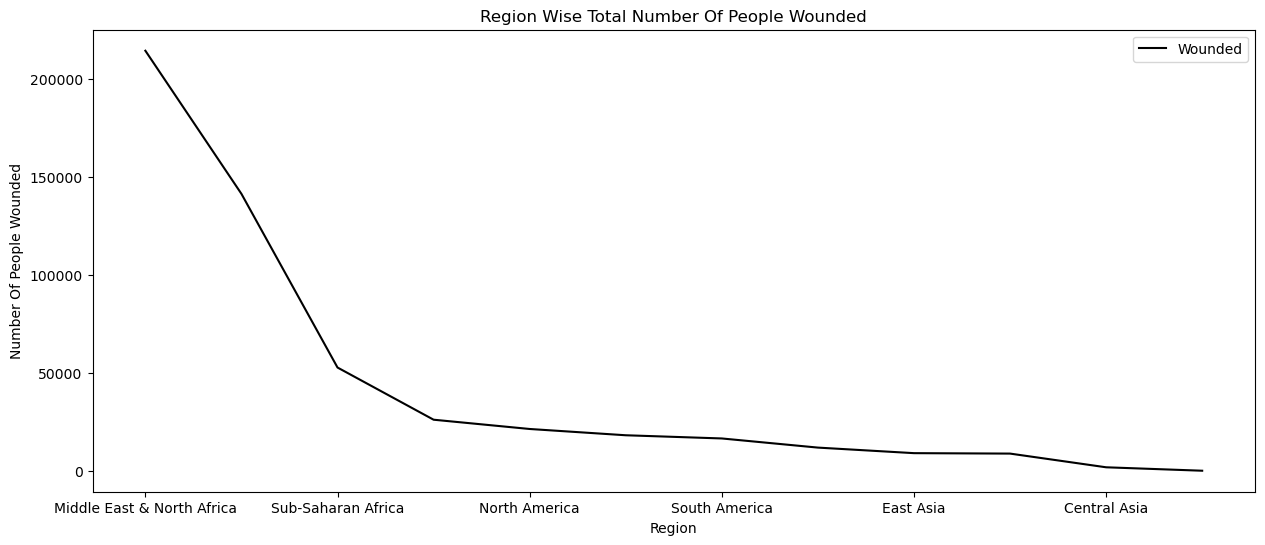

In [68]:
rw.plot(kind="line",color="black",figsize=(15,6))
plt.title("Region Wise Total Number Of People Wounded")
plt.xlabel("Region")
plt.ylabel("Number Of People Wounded")
plt.show()

Observation
1. Attacks 
    (a) Most number of attacks: 50474 in "Middle East & North Africa" 
    (b) Least number of attacks: 282 in "Australasia & Oceania" 
2. Casualties 
    (a) Most number of casualties: 351950 in "Middle East & North Africa" 
    (b) Least number of casualties: 410 in Australasia & Oceania 
3. Killed 
    (a) Most number of people killed: 137642 in "Middle East & North Africa" 
    (b) Least number of people killed: 150 in "Australasia & Oceania" 
4. Wounded
    (a) Most number of people wounded: 214308 in "Middle East & North Africa" 
    (b) Least number of people wounded: 260 in "Australasia & Oceania" 

#### Top 5 Countries

1. Attacks in each country

In [75]:
ca=df["Country"].value_counts().head()
ca

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

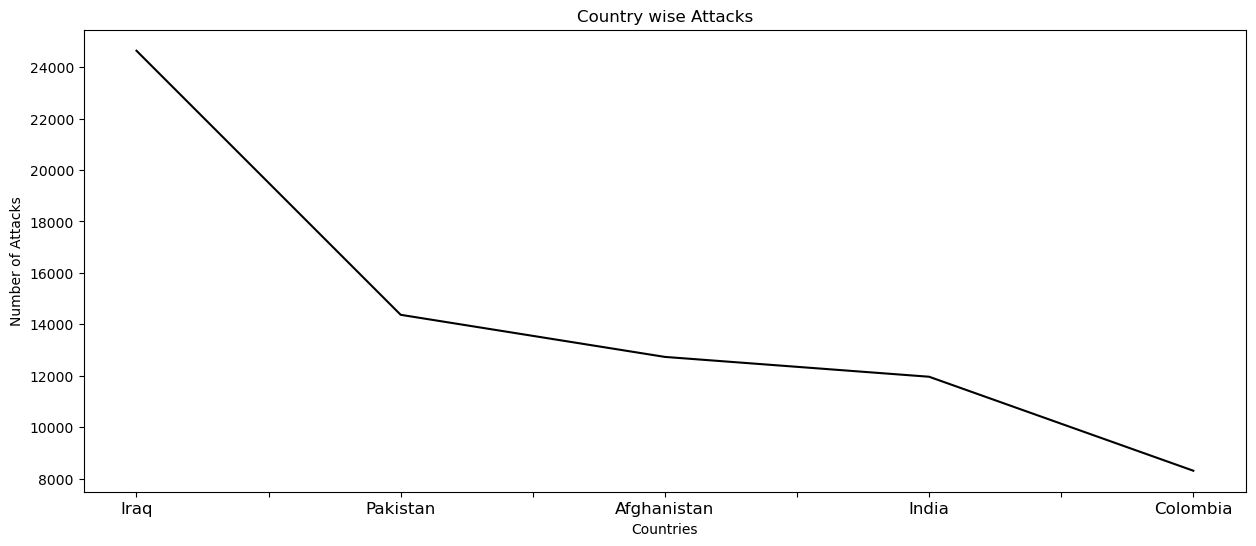

In [76]:
ca.plot(kind="line",color="black",figsize=(15,6))
plt.title("Country wise Attacks")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks")
plt.show()

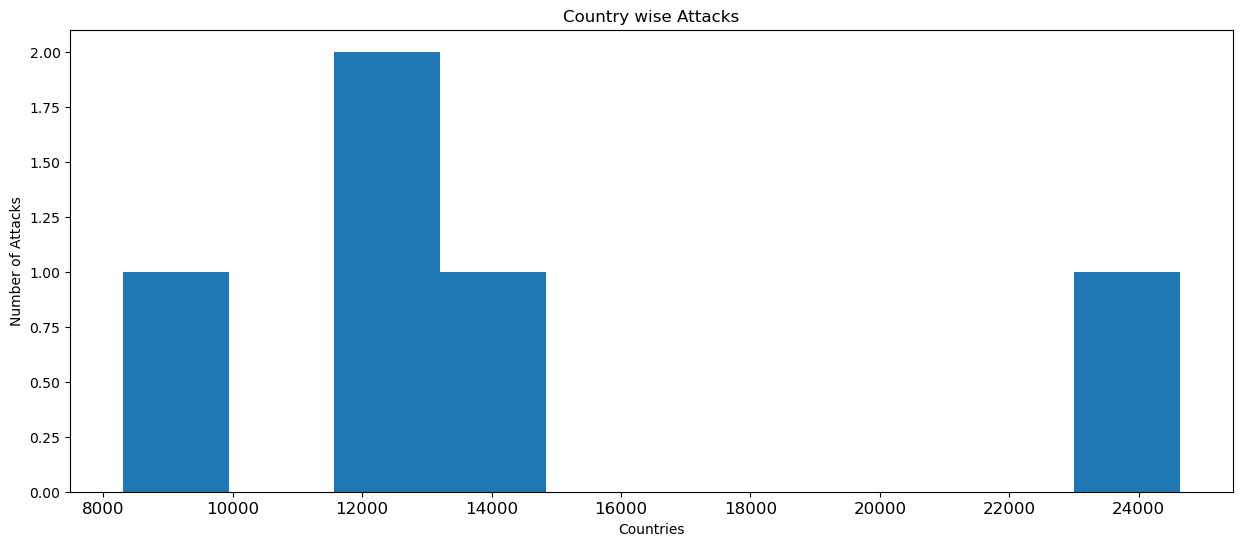

In [77]:
ca.plot(kind="hist",figsize=(15,6))
plt.title("Country wise Attacks")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks")
plt.show()

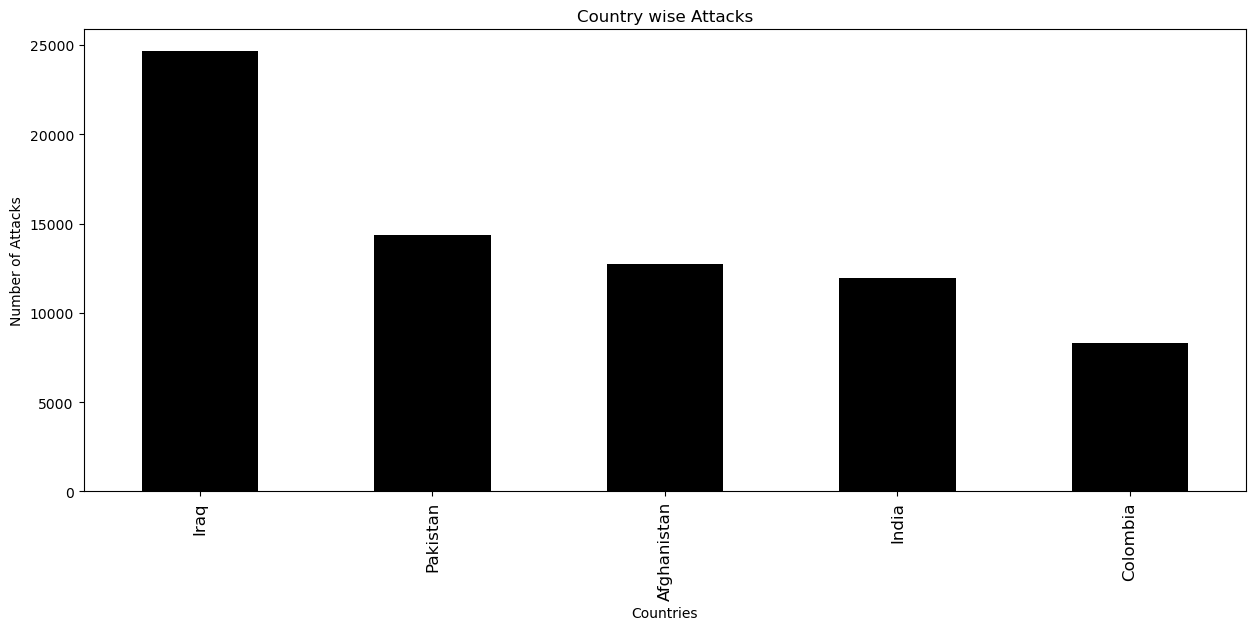

In [79]:
ca.plot(kind="bar",color='black',figsize=(15,6))
plt.title("Country wise Attacks")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks")
plt.show()

2. Casualties in each country

In [80]:
cc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cc.head()

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0


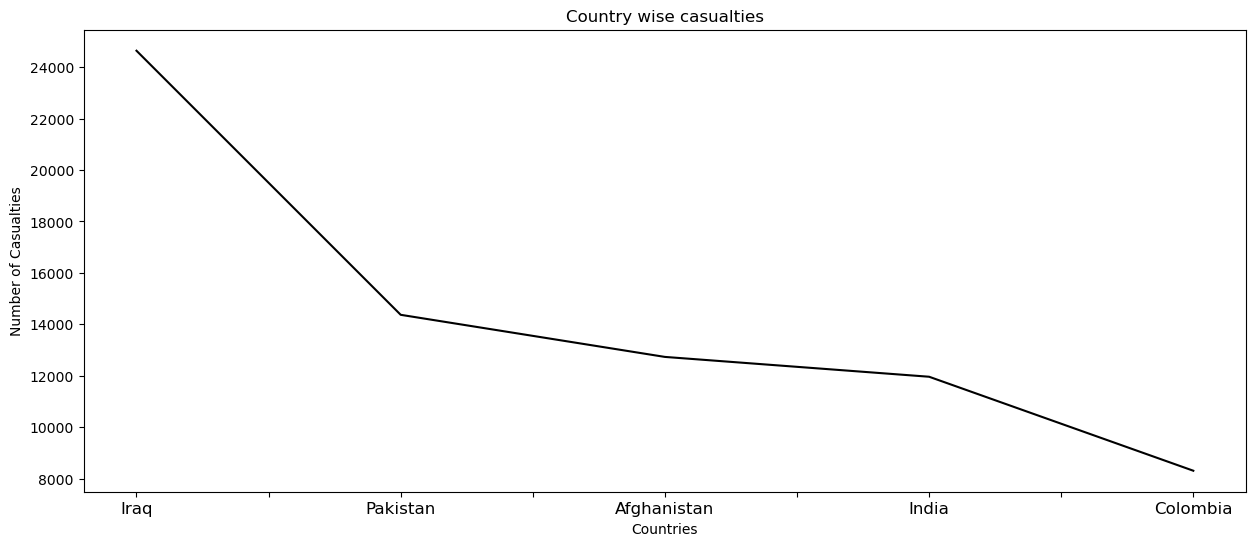

In [87]:
ca.plot(kind="line",color='black',figsize=(15,6))
plt.title("Country wise casualties")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties")
plt.show()

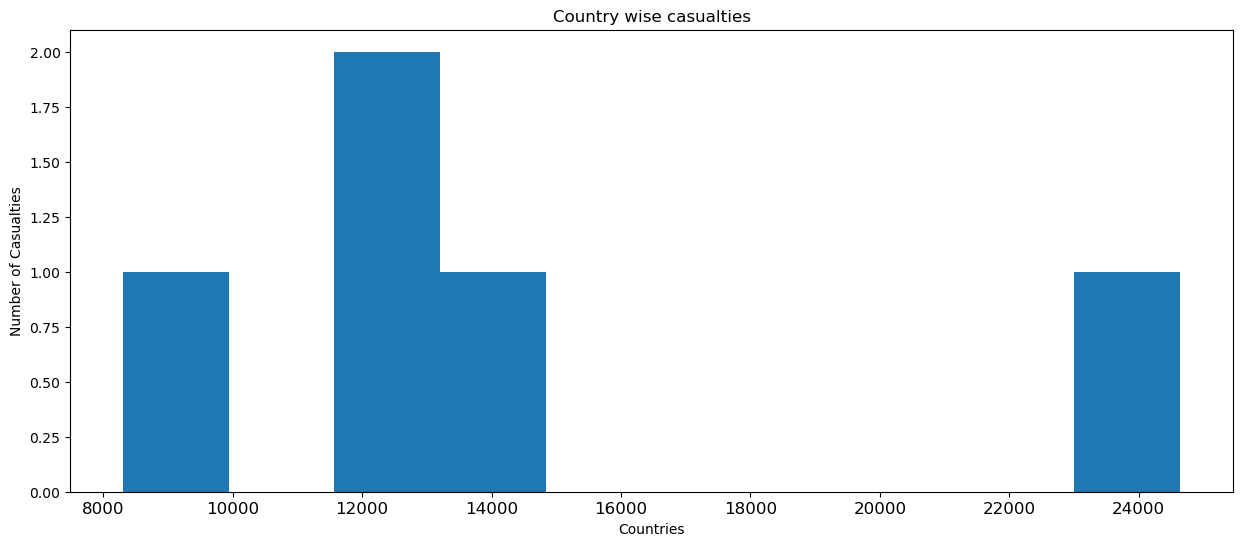

In [88]:
ca.plot(kind="hist",figsize=(15,6))
plt.title("Country wise casualties")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties")
plt.show()

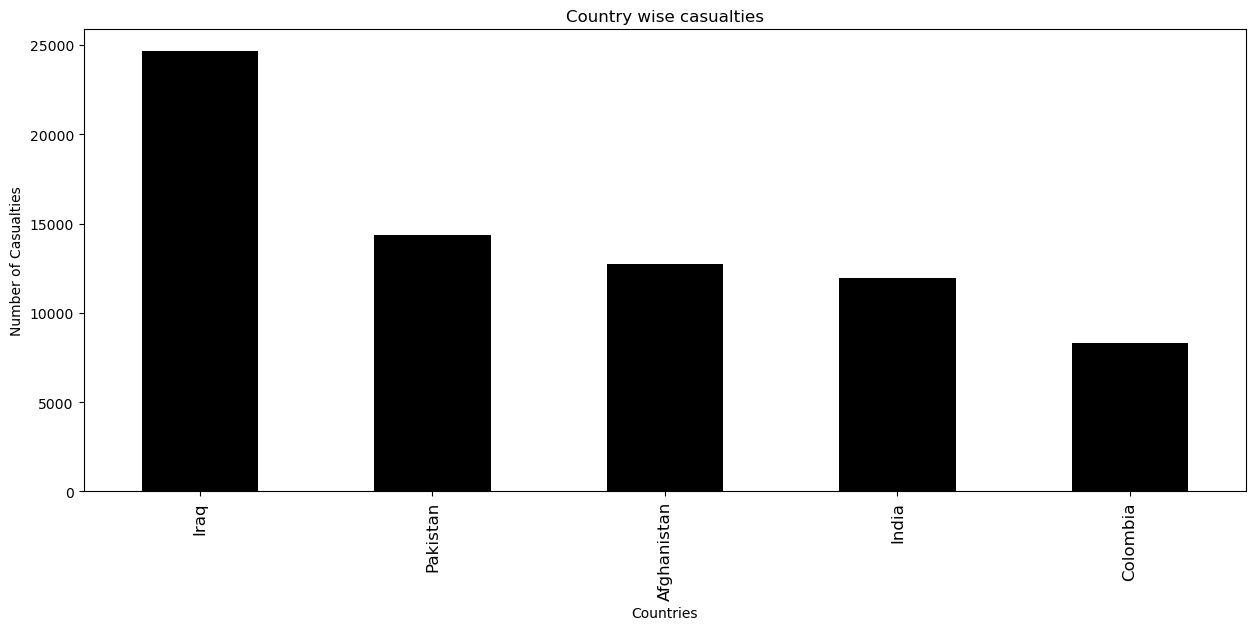

In [89]:
ca.plot(kind="bar",color='black',figsize=(15,6))
plt.title("Country wise casualties")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties")
plt.show()

3. People Killed

In [98]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(5)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0


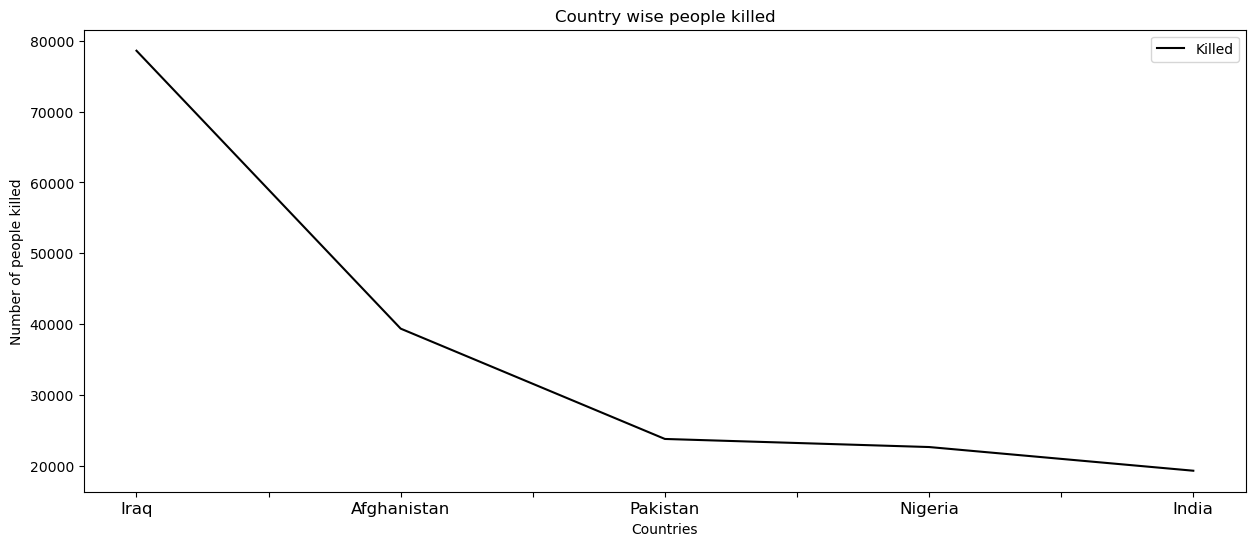

In [106]:
cnk[:5].plot(kind="line",color='black',figsize=(15,6))
plt.title("Country wise people killed")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of people killed")
plt.show()

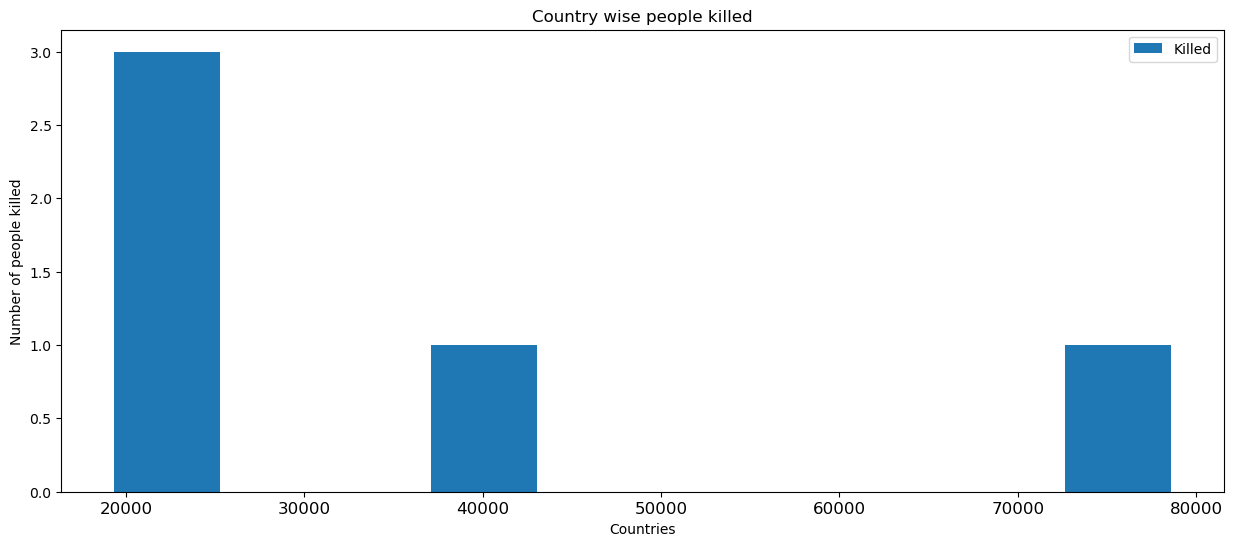

In [104]:
cnk[:5].plot(kind="hist",figsize=(15,6))
plt.title("Country wise people killed")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of people killed")
plt.show()

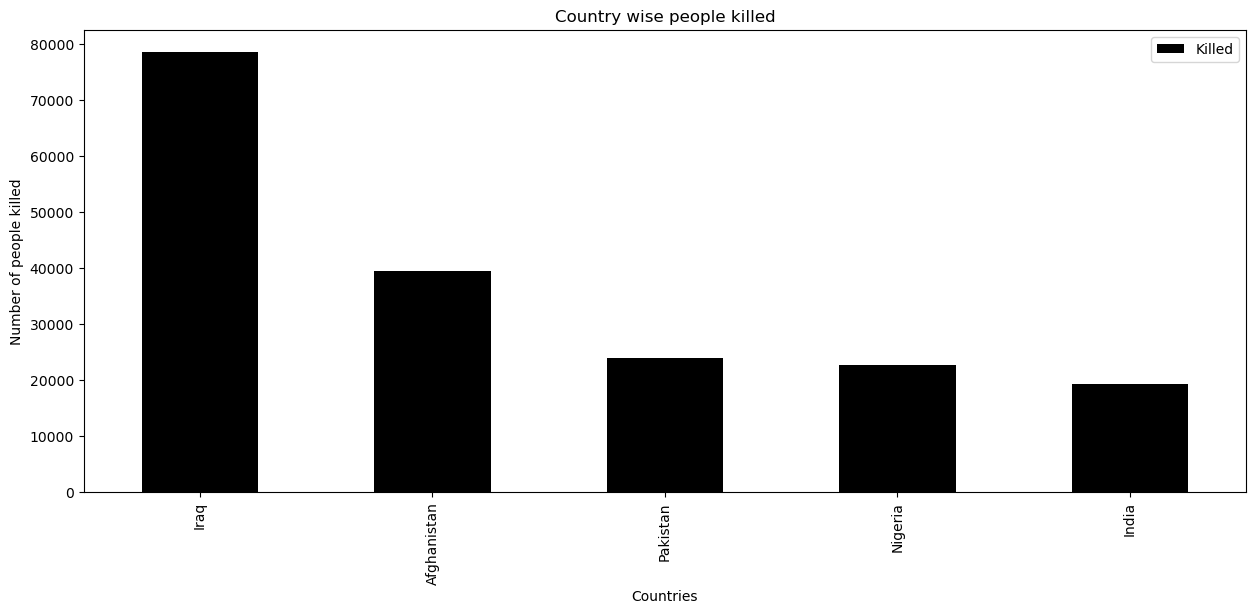

In [103]:
cnk[:5].plot(kind="bar",color='black',figsize=(15,6))
plt.title("Country wise people killed")
plt.xlabel("Countries")
plt.ylabel("Number of people killed")
plt.show()

4. People Wounded

In [108]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head()

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0


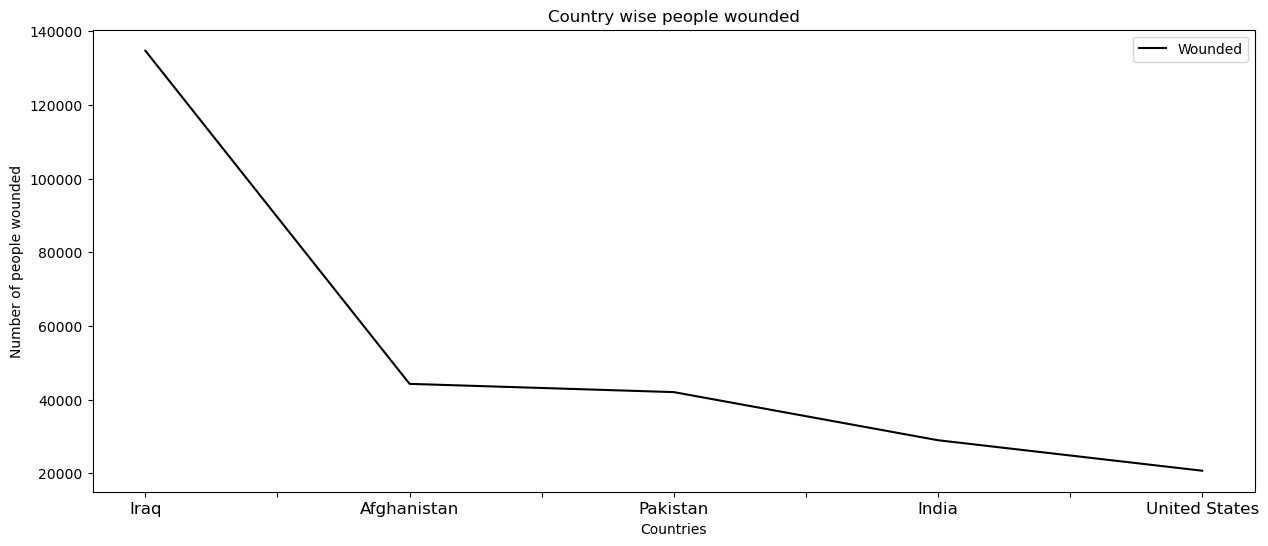

In [110]:
cnw[:5].plot(kind="line",color='black',figsize=(15,6))
plt.title("Country wise people wounded")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of people wounded")
plt.show()

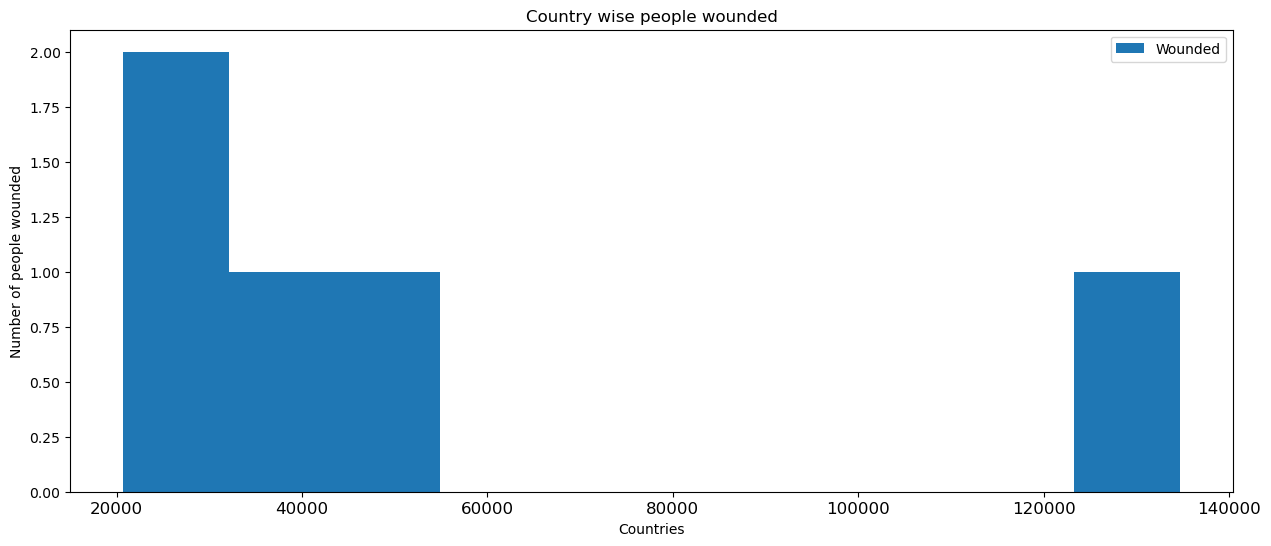

In [111]:
cnw[:5].plot(kind="hist",figsize=(15,6))
plt.title("Country wise people wounded")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of people wounded")
plt.show()

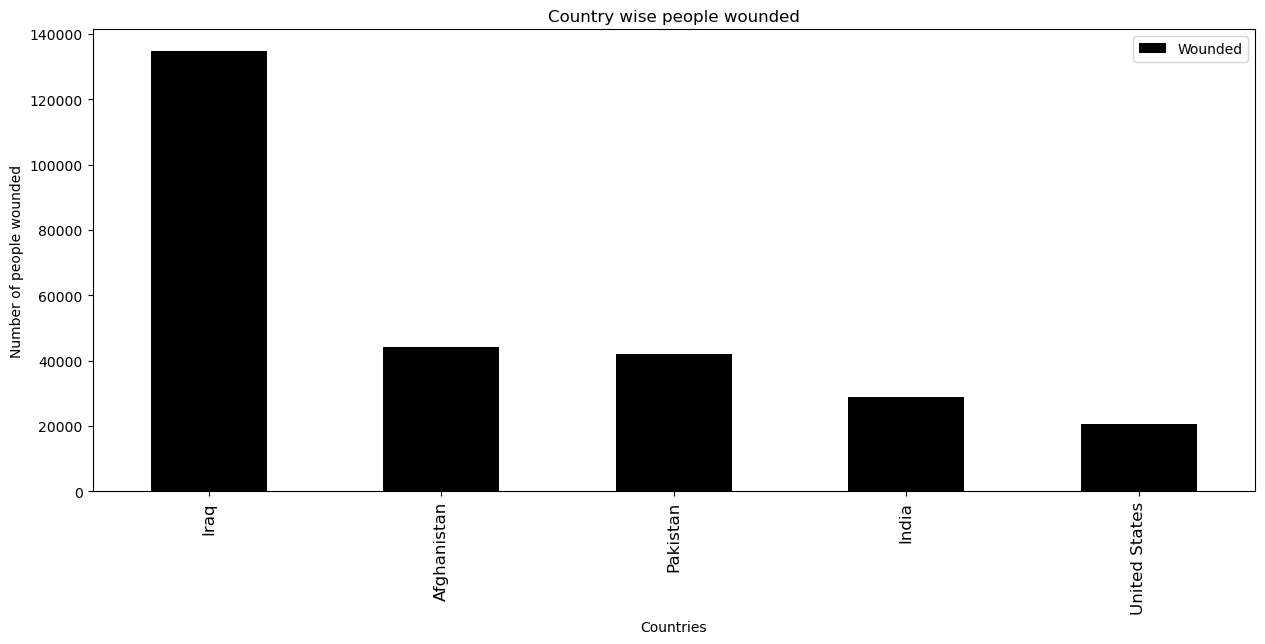

In [112]:
cnw[:5].plot(kind="bar",color='black',figsize=(15,6))
plt.title("Country wise people wounded")
plt.xlabel("Countries")
plt.xticks(fontsize=12)
plt.ylabel("Number of people wounded")
plt.show()

Observation
1. Attacks 
    (a) Most number of attacks: 24636 in "Iraq" 
    (b) Least number of attacks: 8306 in "Colombia" 
2. Casualties 
    (a) Most number of casualties: 213279 in "Iraq" 
    (b) Least number of casualties: 32921 in "Colombia" 
3. Killed 
    (a) Most number of people killed: 78589 in "Iraq" 
    (b) Least number of people killed: 19341 in "El india" 
4. Wounded
    (a) Most number of people wounded: 134690 in "Iraq" 
    (b) Least number of people wounded: 20702 in "United States" 

# Author
#### Aditya Deshpande